In [20]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# The Simple Pendulum Problem
Damped, in this case. We will solve this ODE in position/velocity space using Newton's, Midpoint, and finally a Runge-Kutta method. We will first introduce the problem and tackle it with Newton's method.

In [21]:
#physical constants
g = 9.8
L = 2
mu = 0.1

In [22]:
# initial conditions
Theta_0 = np.pi / 3
Theta_Dot_0 = 0

In [23]:
# define a function to get acceleration
def get_theta_double_dot(theta, theta_dot):
    return (-mu * theta_dot) - ((g * np.sin(theta)) / L)

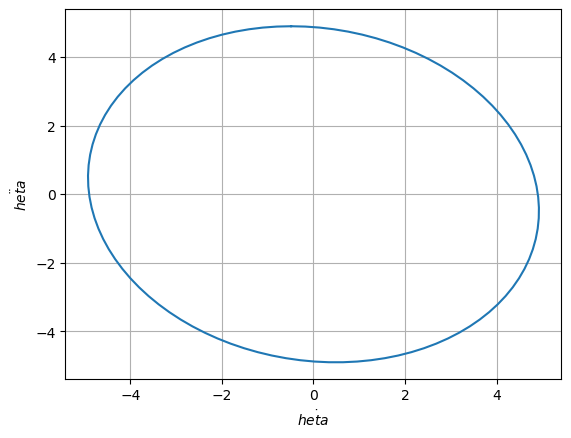

In [24]:
theta = np.linspace(0, 2*np.pi, 10**2)
theta_0 = lambda x: (g / L) * np.cos(x)

plt.grid()
plt.xlabel("$\dot{ \theta } $")
plt.ylabel("$\ddot{ \theta } $")
plt.plot( get_theta_double_dot(theta=theta, theta_dot=theta_0(theta)), theta_0(theta) )

In [25]:
# define a function theta of time - this is numerical, even though we have an analytical solution
def theta(t):
    theta = Theta_0
    theta_dot = Theta_Dot_0
    delta_t = 0.01
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot ( theta=theta, theta_dot=theta_0 )
        theta_dot += theta_double_dot * delta_t #bootstrap method for calculating - Euler's Method
        theta += theta_dot * delta_t
    return theta

### Different Methods
We used Euler's Method in the previous cell. This can diverge easily, and is quite crude. We will explain the midpoint method and the Runge-Kutta Methods afterwards, the latter is a very wonderful and desireable toolbox of solutions and will be used forever afterwards.

Before we proceed with that, we use will write a function that solves an ODE using Euler's Method.

In [26]:
# Euler's Method for solving ODEs
def euler (f, x0, t0, tmax, dt):
    N = int(np.floor((tmax - t0) / dt) + 1)
    t = np.linspace (t0, tmax, N + 1)
    x = np.zeros_like(t)
    x[0] = x0
    for n in range(1, len(t)):
        x[n] = x[n-1] + (dt * f(t[n-1], x[n-1]))
    
    return t, x

def euler_lambda (f, x0, t0, tmax, dt, lam):
    N = int(np.floor((tmax - t0) / dt) + 1)
    t = np.linspace (t0, tmax, N + 1)
    x = np.zeros_like(t)
    x[0] = x0
    for n in range(1, len(t)):
        x[n] = x[n-1] + ( dt * (lam*f(t[n-1], x[n-1])) )
    
    return t, x

def euler_arr (f, x0, t0, tmax, dt, par_arr):
    # On multivalued possibly non-autonomous function using several parameters
    N = int(np.floor((tmax - t0) / dt) + 1)
    l = par_arr[0]
    t = np.linspace (t0, tmax, N + 1)
    var_arr = np.zeros_like(t, l)
    var_arr.reshape(t, l)
    var_arr[0, 0] = x0
    for n in range(1, len(t)):
        for k in range(l):
            var_arr[n][k] = var_arr[n-1][k] + (dt * f(t[n-1], var_arr[n-1], par_arr))
    
    return np.concatenate(t, var_arr, axis=0)

In [27]:
# define functions
f = lambda t, x: -(1/3) * x + np.sin(t)
g = lambda t, x: (x - np.cos(t)) - np.sin(t)
g_arr = lambda arr: arr[0](arr[1] - np.cos(arr[2])) - np.sin(arr[2])

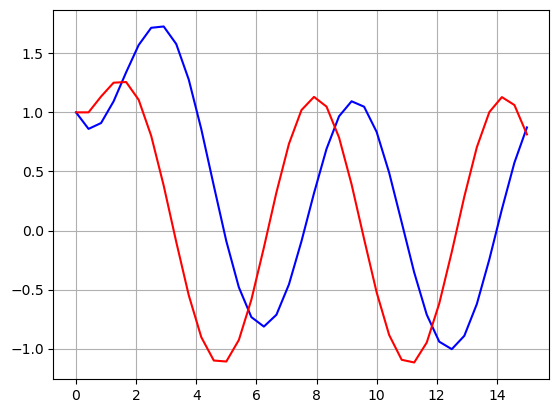

In [28]:
# run euler's solution
x0 = 1
t0 = 0
tmax = 15
dt = 42 * 10**(-2)
t, x = euler (f=f, x0=x0, t0=t0, tmax=tmax, dt=dt)
tg, xg = euler_lambda (f=g, x0=x0, t0=t0, tmax=tmax, dt=dt, lam=-1)
plt.plot(t, x, 'b')
plt.plot(tg, xg, 'r')
plt.grid()
plt.show()

In [29]:
def euler_animator(x0, tmax, dt):
    t, x = euler(f, x0, t0, tmax, dt)
    plt.plot(t, x, 'b')
    plt.xlabel("Time $t$, in seconds")
    plt.ylabel("Position $x$, in meters")
    plt.xlim(0, 30)
    plt.ylim(np.min(x) - 1, np.max(x) + 1)
    plt.grid()
    plt.show()

def euler_animator_2(x0, tmax, dt, lam):
    t, x = euler_lambda(g, x0, t0, tmax, dt, lam)
    plt.plot(t, x, 'r')
    if (lam < -15):
        plt.loglog()
    plt.xlabel("Time $t$, in seconds")
    plt.ylabel("Position $x$, in meters")
    plt.xlim(0, tmax + 1)
    plt.ylim(np.min(x) - 1, np.max(x) + 1)
    plt.grid()
    plt.show()

In [30]:
interactive_plot = interactive(euler_animator,
                               x0 = (-10, 10, 0.5),
                               tmax = (1, 30, 0.1),
                               dt = (0.1, 0.75, 0.005))

interactive_plot_2 = interactive(euler_animator_2,
                               x0 = (-3, 2, 0.5),
                               tmax = (1, 30, 0.1),
                               dt = (0.1, 0.75, 0.005),
                               lam = (-1*(20**1), 0, 1))

In [31]:
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

In [32]:
interactive_plot_2

interactive(children=(FloatSlider(value=-1.0, description='x0', max=2.0, min=-3.0, step=0.5), FloatSlider(valu…

In [33]:
# Midpoint Method
def midpoint(f, x0, t0, tmax, dt, lam):
    N = int(np.floor((tmax - t0) / dt) + 1)
    t = np.linspace (t0, tmax, N + 1)
    x = np.zeros_like(t)
    x[0] = x0
   
    for n in range(len(t) - 1):
        m_n = f (t[n], x[n])
        x_mid = x[n] + (dt / 2) * m_n
        x[n+1] = x[n] + dt * lam * f(t[n] + dt / 2, x_mid)
    
    return t, x

In [34]:
def midpoint_animator(x0, tmax, dt, lam=1):
    t, x = midpoint(f, x0, t0, tmax, dt, lam)
    plt.plot(t, x, 'b')
    plt.xlabel("Time $t$, in seconds")
    plt.ylabel("Position $x$, in meters")
    plt.xlim(0, 30)
    plt.ylim(np.min(x) - 1, np.max(x) + 1)
    plt.grid()
    plt.show()

interactive_plot_mid = interactive(midpoint_animator,
                            x0 = (-10, 10, 0.5),
                            tmax = (1, 30, 0.1),
                            dt = (0.1, 0.75, 0.005),
                            lam = (-20, 2, 1))

In [35]:
interactive_plot_mid

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

In [42]:
# Runge-Kutta Method
def rk4(f, x0, t0, tmax, dt):
    N = int(np.floor((tmax - t0) / dt) + 1)
    t = np.linspace (t0, tmax, N + 1)
    x = np.zeros_like(t)
    x[0] = x0
   
    for n in range(len(t) - 1):
        k1 = f(t[n], x[n])
        k2 = f(t[n] + (dt/2), x[n] + (dt/2) * k1)
        k3 = f(t[n] + (dt/2), x[n] + (dt/2) * k2)
        k4 = f(t[n] + dt, x[n] + (dt * k3))

        x[n+1] = x[n] + ((dt/6)*(k1 + ( 2 * (k2 + k3) ) + k4))
    
    return t, x

In [43]:
def rk4_animator(x0, tmax, dt):
    t, x = rk4(f, x0, t0, tmax, dt)
    plt.plot(t, x, 'b')
    plt.xlabel("Time $t$, in seconds")
    plt.ylabel("Position $x$, in meters")
    plt.xlim(0, 30)
    plt.ylim(np.min(x) - 1, np.max(x) + 1)
    plt.grid()
    plt.show()

interactive_plot_rk4 = interactive(rk4_animator,
                            x0 = (-10, 10, 0.5),
                            tmax = (1, 30, 0.1),
                            dt = (0.1, 0.75, 0.005))

interactive_plot_rk4

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0, step=0.5), FloatSlider(val…